In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats
import statsmodels.tsa.stattools as sts

#Cargar los datos

In [3]:
habitat_E = pd.read_csv('Habitat-E.csv', index_col = 0, parse_dates = True)
habitat_E.head()

,Open,High,Low,Close,Volume
Date,,,,,
2002-08-01,11764,11778,11764,11778,0
2002-08-02,11778,11778,11775,11775,0
2002-08-03,11775,11775,11775,11775,0
2002-08-04,11775,11775,11775,11775,0
2002-08-05,11775,11796,11775,11796,0


#Preprocesamiento de los datos

##Identificación de valores nulos

In [10]:
habitat_E.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

#Análisis de los datos

##Verificar si los datos de la serie siguen una distribución normal

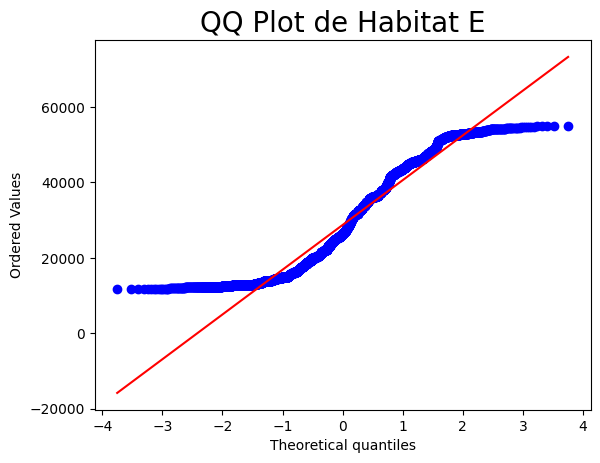

In [12]:
scipy.stats.probplot(habitat_E['Close'], plot = plt)        #Se obtuvo que los datos no siguen el comportamiento normal
plt.title('QQ Plot de Habitat E', size = 20)
plt.show()

##Verificar si los datos presentan o no estacionariedad

In [14]:
sts.adfuller(habitat_E.Close)           #De acuerdo a la prueba de hipótesis considerando H0 que la serie es no estacionaria
                                        #Como se obtuvo un valor P de 0.99 el cual es mayor a -2.86 con un nivel de significancia del 5%

(0.9947191289859271,
 0.9942099155460982,
 33,
 7874,
 {'1%': -3.4311807636661724,
  '5%': -2.861907137206615,
  '10%': -2.5669654224972964},
 91389.2079923388)

##Estacionalidad

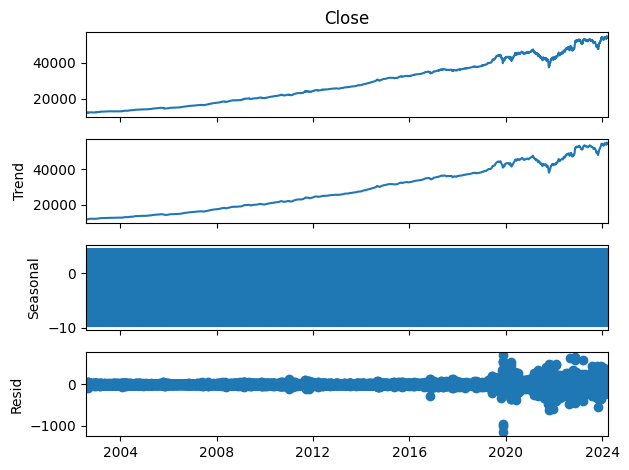

In [18]:
s_dec_additive = seasonal_decompose(habitat_E['Close'], model = 'additive')
s_dec_additive.plot()
plt.show()

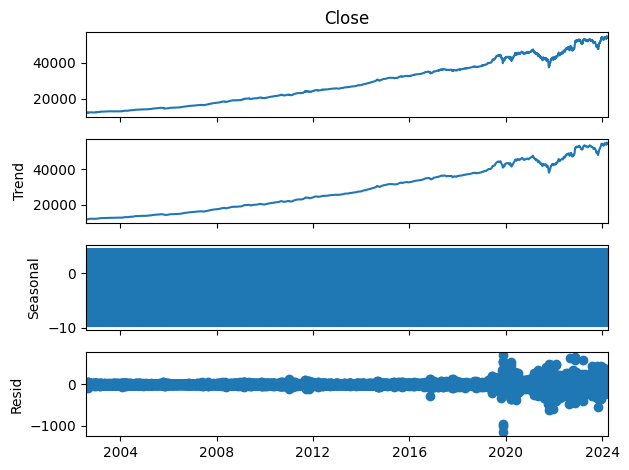

In [19]:
s_dec_multiplicative = seasonal_decompose(habitat_E['Close'], model = 'amultiplicative') #No es una serie de tipo estacionaria, ya que no se identifica un patrón
s_dec_multiplicative.plot()                                                              #Tiene una tendencia positiva creciente
plt.show()